In [1]:
import kaggle

OSError: ignored

In [2]:
!mkdir -p /root/.kaggle
!mv kaggle.json /root/.kaggle

In [3]:
import kaggle

In [4]:
!kaggle competitions download -c dogs-vs-cats

 98% 265M/271M [00:07<00:00, 37.9MB/s]
100% 271M/271M [00:07<00:00, 39.6MB/s]
 97% 529M/543M [00:09<00:00, 77.6MB/s]
100% 543M/543M [00:09<00:00, 62.0MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 84.6MB/s]


In [5]:
!unzip -q train.zip

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
!ls train

cat.0.jpg      cat.3250.jpg  cat.7751.jpg   dog.12250.jpg  dog.5500.jpg
cat.10000.jpg  cat.3251.jpg  cat.7752.jpg   dog.12251.jpg  dog.5501.jpg
cat.10001.jpg  cat.3252.jpg  cat.7753.jpg   dog.12252.jpg  dog.5502.jpg
cat.10002.jpg  cat.3253.jpg  cat.7754.jpg   dog.12253.jpg  dog.5503.jpg
cat.10003.jpg  cat.3254.jpg  cat.7755.jpg   dog.12254.jpg  dog.5504.jpg
cat.10004.jpg  cat.3255.jpg  cat.7756.jpg   dog.12255.jpg  dog.5505.jpg
cat.10005.jpg  cat.3256.jpg  cat.7757.jpg   dog.12256.jpg  dog.5506.jpg
cat.10006.jpg  cat.3257.jpg  cat.7758.jpg   dog.12257.jpg  dog.5507.jpg
cat.10007.jpg  cat.3258.jpg  cat.7759.jpg   dog.12258.jpg  dog.5508.jpg
cat.10008.jpg  cat.3259.jpg  cat.775.jpg    dog.12259.jpg  dog.5509.jpg
cat.10009.jpg  cat.325.jpg   cat.7760.jpg   dog.1225.jpg   dog.550.jpg
cat.1000.jpg   cat.3260.jpg  cat.7761.jpg   dog.12260.jpg  dog.5510.jpg
cat.10010.jpg  cat.3261.jpg  cat.7762.jpg   dog.12261.jpg  dog.5511.jpg
cat.10011.jpg  cat.3262.jpg  cat.7763.jpg   dog.12262.jpg  dog.55

In [3]:
images = []
labels = []

In [4]:
import os
import cv2
from PIL import Image
from tqdm.notebook import tqdm

In [5]:
for filename in tqdm(os.listdir("train")[:10000]):
  image = cv2.imread("train/"+filename)
  image = cv2.resize(image,(150,150))
  images.append(image)
  if("cat" in filename):
    labels.append(0)
  else:
    labels.append(1)
  

In [6]:
images = np.array(images)
labels = np.array(labels)

In [7]:
images.shape

(10000, 150, 150, 3)

In [8]:
labels.shape

(10000,)

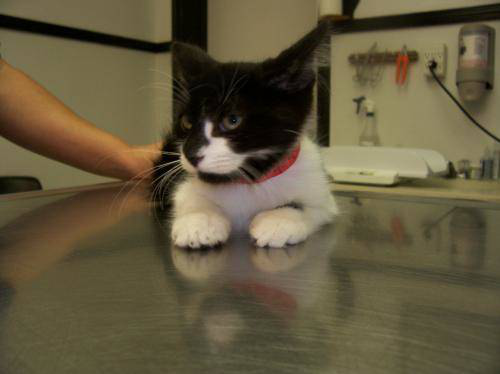

In [9]:
Image.open("train/cat.774.jpg")

In [10]:
images = images/255
from tensorflow.keras.utils import to_categorical
labels = to_categorical(labels)
labels.shape

(10000, 2)

In [11]:
import tensorflow as tf

In [12]:
tf.__version__

'2.3.0'

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPooling2D
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.activations import relu,softmax
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

In [14]:
# if model:
#   del model
model = Sequential()
model.add(Conv2D(64,(3,3),strides = (1,1),input_shape=(150,150,3),activation=relu))
model.add(MaxPooling2D())
model.add(Conv2D(128,kernel_size=(3,3),activation=relu))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128,activation=relu))
model.add(Dense(128,activation=relu))
model.add(Dense(2,activation=softmax))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 165888)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               21233792  
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1

In [15]:
#output shape = (I - F + S)/S
#conv2d_6 output shape = (150 - 3 + 1)/1 = 148 so (148,148,64)
#max_pooling_6 = 148/2 = 74 so (74,74,64)
#conv2d_7 output shape = (74 - 3 + 1)/1 = 72 so (72,72,128)
#max_pooling_7 = 72/2 = 36 so (36,36,128)
#flatten_3 output shape = 36*36*128 = 165888
#conv2d_6 params = 64*3*3*3 + 64 = 1792
#conv2d_7 params = 128*3*3*64 = 73856
#dense_8 params = 165888*128 + 128 = 21233792
#dense_9 params = 128*2+2 = 258


In [16]:
model.compile(optimizer=SGD(),loss=categorical_crossentropy,metrics = ["acc"])

In [17]:
modelckpt = ModelCheckpoint("checkpoint",monitor = "val_loss",verbose = 1)

In [18]:
es = EarlyStopping(monitor="val_loss",min_delta=0.2,patience=3,verbose = 1)

In [19]:
model_history = model.fit(images,labels,epochs=30,validation_split=0.1,batch_size=64,callbacks=[modelckpt,es])

Epoch 1/30
141/141 [==============================] - ETA: 0s - loss: 0.6873 - acc: 0.5497
Epoch 00001: saving model to checkpoint
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: checkpoint/assets
141/141 [==============================] - 21s 145ms/step - loss: 0.6873 - acc: 0.5497 - val_loss: 0.6748 - val_acc: 0.6060
Epoch 2/30
141/141 [==============================] - ETA: 0s - loss: 0.6704 - acc: 0.5876
Epoch 00002: saving model to checkpoint
INFO:tensorflow:Assets written to: checkpoint/assets
141/141 [==============================] - 20s 139ms/step - loss: 0.6704 - acc: 0.5876 - val_loss: 0.6743 - val_acc: 0.5520
Epoch 3/30
141/141 [==============================] - ETA: 0s - loss: 0.6553 - acc: 0.6076
Epoch 00003: saving model to checkpoint
INFO:tensorflow:Ass

In [20]:
model_history.history

{'acc': [0.5496666431427002,
  0.5875555276870728,
  0.6075555682182312,
  0.6255555748939514],
 'loss': [0.6872584819793701,
  0.6703757047653198,
  0.6552919149398804,
  0.6418006420135498],
 'val_acc': [0.6060000061988831,
  0.5519999861717224,
  0.621999979019165,
  0.6330000162124634],
 'val_loss': [0.6748304963111877,
  0.6742854118347168,
  0.6446710228919983,
  0.6374038457870483]}

In [21]:
model_history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

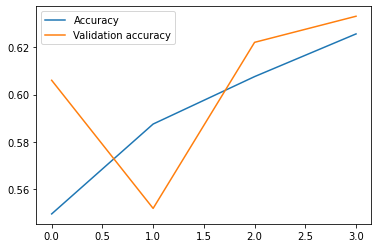

In [22]:
plt.plot(model_history.history.get("acc"),label = "Accuracy")
plt.plot(model_history.history.get("val_acc"),label = "Validation accuracy")
plt.legend()

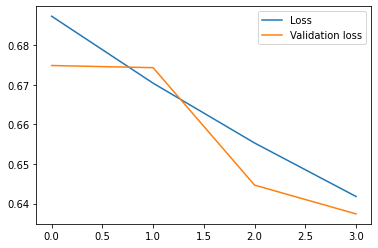

In [23]:
plt.plot(model_history.history.get("loss"),label="Loss")
plt.plot(model_history.history.get("val_loss"),label = "Validation loss")
plt.legend()